 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [132]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [133]:
whale_path = Path("Resources/whale_returns.csv")

In [134]:
# Reading whale returns
whale_returns = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [135]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [136]:
# Drop nulls
whale_returns.dropna(inplace = True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [137]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns['Algo 1'] = algo_returns['Algo 1'].astype(float)
algo_returns['Algo 2'] = algo_returns['Algo 2'].astype(float)
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [138]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [139]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [140]:
# Reading S&P TSX 60 Closing Prices
tsx_path = Path("Resources/sp_tsx_history.csv")
tsx_history = pd.read_csv(tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsx_history

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [141]:
# Check Data Types
tsx_history.dtypes

Close    object
dtype: object

In [142]:
# Fix Data Types
tsx_history['Close'] = tsx_history['Close'].str.replace("$","").str.replace(",","").astype(float)
tsx_history

<ipython-input-142-ae06eb0fe2e0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tsx_history['Close'] = tsx_history['Close'].str.replace("$","").str.replace(",","").astype(float)


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [143]:
# Sort Date index
tsx_history = tsx_history.sort_index()
tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [144]:
# Calculate Daily Returns
tsx_returns = tsx_history.pct_change()
tsx_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [145]:
# Rename `Close` Column to be specific to this portfolio.
tsx_returns.rename(columns={'Close': 'S&P TSX'}, inplace=True)
tsx_returns

,S&P TSX
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [146]:
# Drop nulls
tsx_returns.dropna(inplace = True)
tsx_returns

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [147]:
#Join Whale Returns, Algorithmic Returns, and S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, tsx_returns], axis="columns", join="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

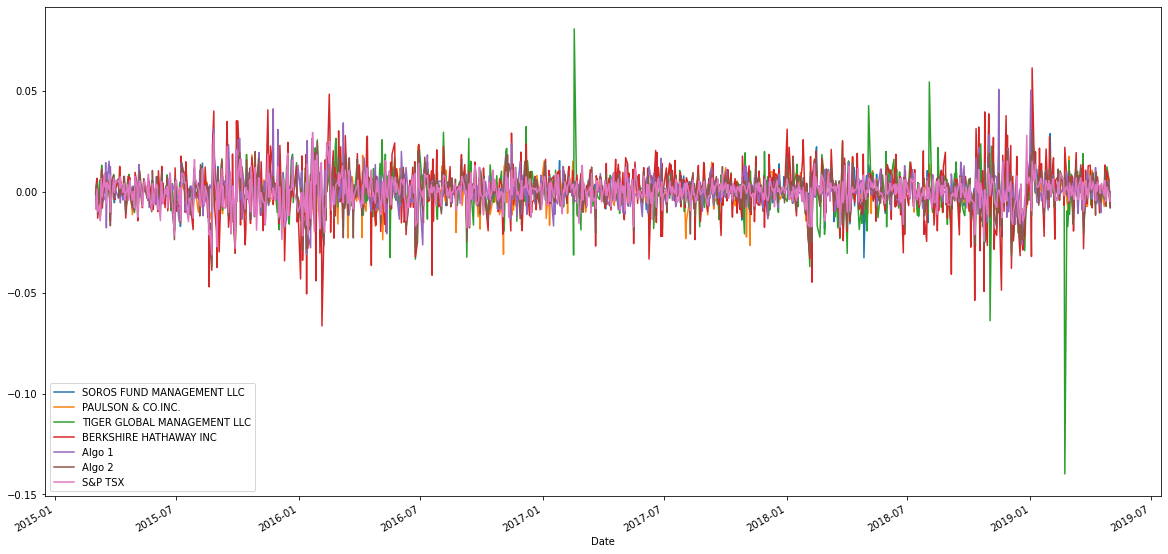

In [148]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

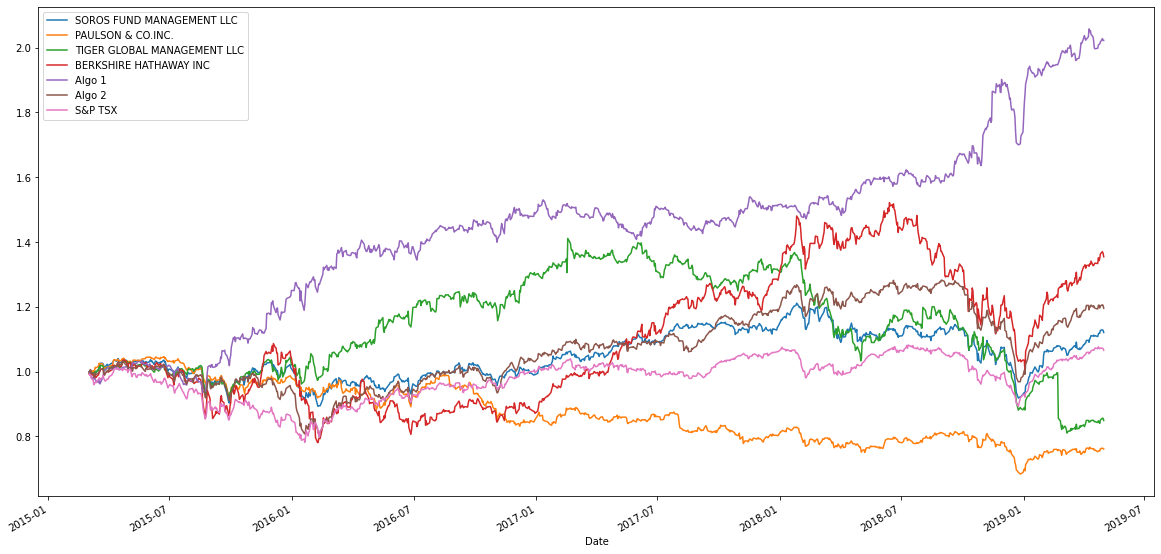

In [149]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_returns).cumprod()
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

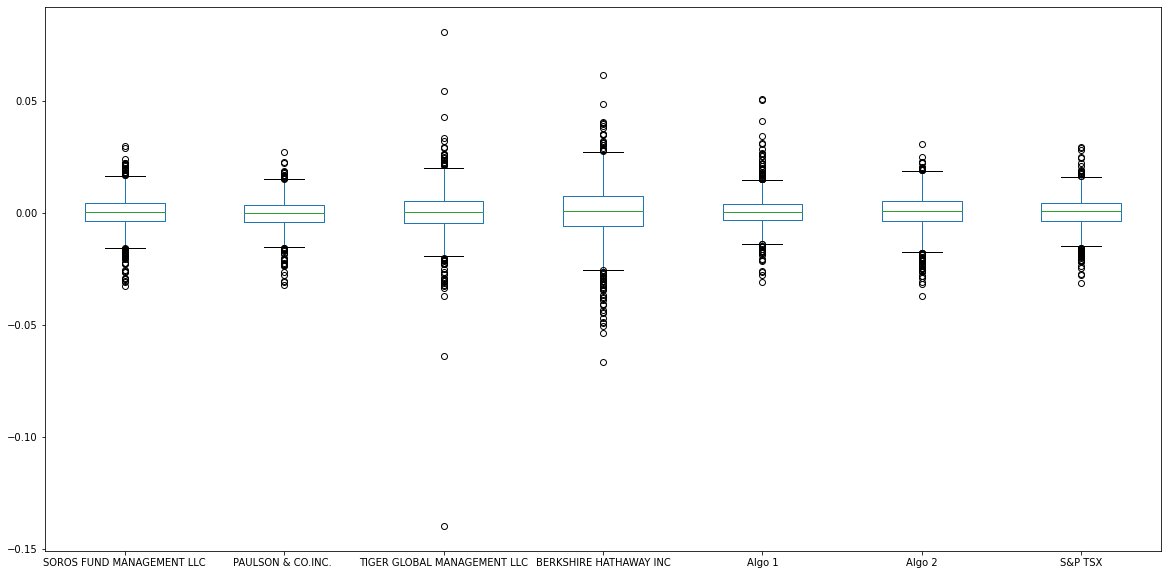

In [150]:
# Box plot to visually show risk
combined_returns.plot(kind="box", figsize=(20,10))

### Calculate Standard Deviations

In [151]:
# Calculate the daily standard deviations of all portfolios
std_dev = pd.DataFrame(combined_returns.std()).rename(columns={0:"Sigma"})
std_dev

,Sigma
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [152]:
# Determine which portfolios are riskier than the S&P TSX 60
risky_portfolios = std_dev[std_dev["Sigma"] > std_dev.loc["S&P TSX", "Sigma"]]
risky_portfolios

,Sigma
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [193]:
# Calculate the annualized standard deviation (252 trading days)
ann_std_dev = std_dev*np.sqrt(252)
ann_std_dev.rename(columns={"Sigma":"Ann_Sigma"},inplace = True)
ann_std_dev

,Ann_Sigma
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P TSX,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

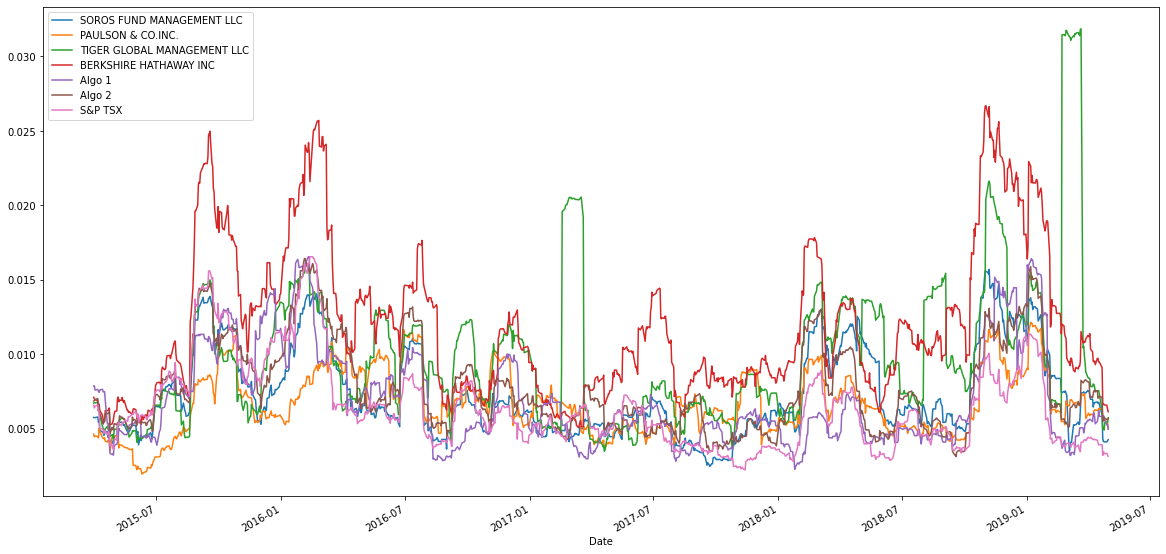

In [154]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll_std_dev = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
roll_std_dev.plot(figsize=(20,10))

### Calculate and plot the correlation

In [155]:
# Calculate the correlation
corr = combined_returns.corr()

# Display the correlation matrix
corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-day Beta for Algo 2'}, xlabel='Date'>

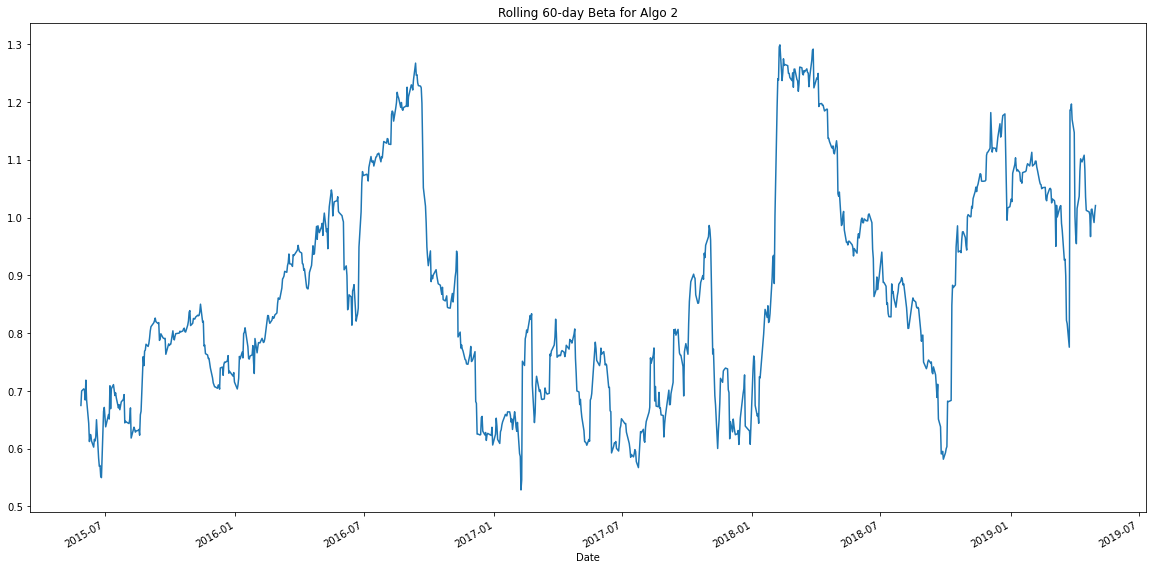

In [156]:
# Calculate covariance of a single portfolio
roll_covar = combined_returns['Algo 2'].rolling(window=60).cov(combined_returns['S&P TSX'])

# Calculate variance of S&P TSX
roll_var = combined_returns["S&P TSX"].rolling(window = 60).var()

# Computing beta
roll_beta = roll_covar / roll_var

# Plot beta trend
roll_beta.plot(figsize = (20,10), title = 'Rolling 60-day Beta for Algo 2')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

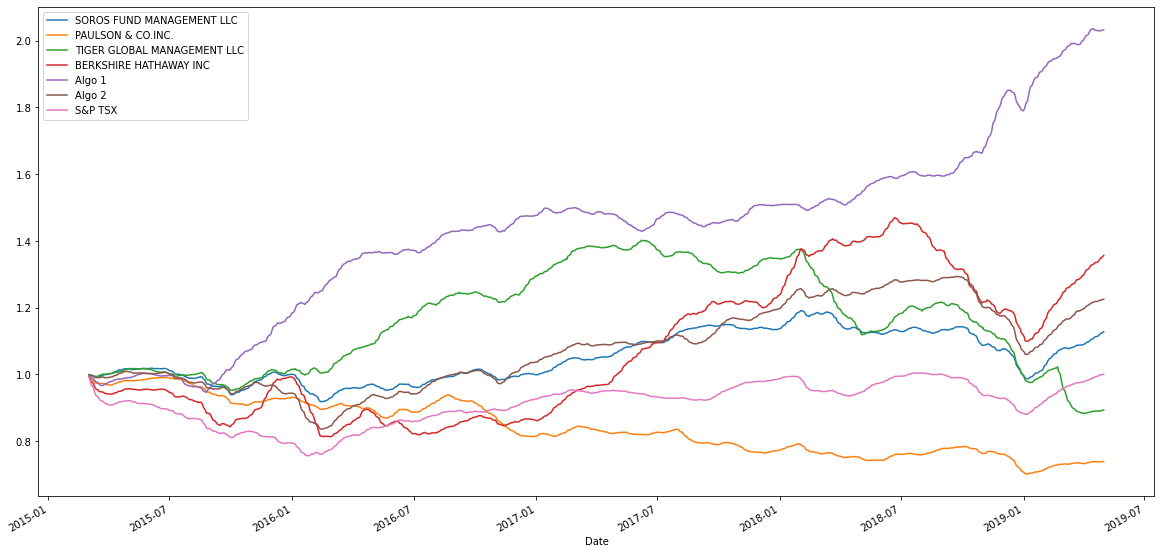

In [157]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm = combined_returns.ewm(span = 21,adjust = False).mean()
(1+combined_returns_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [158]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_returns.mean()*252/(combined_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

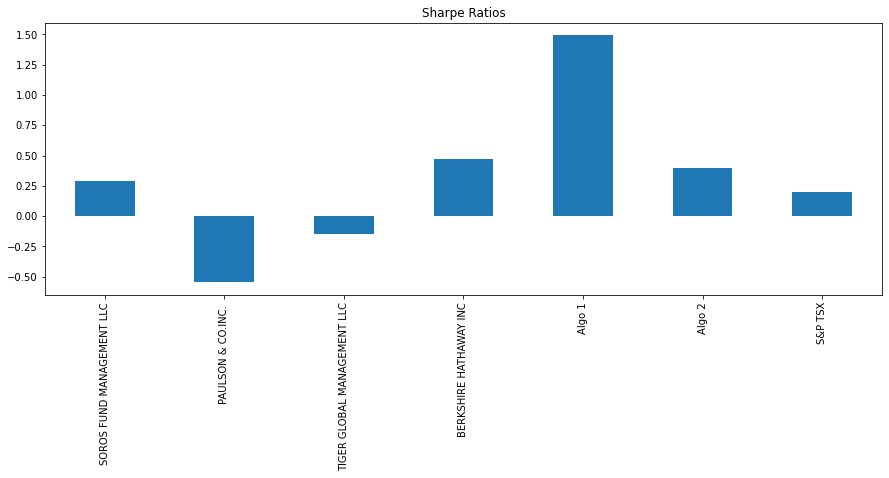

In [159]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios", figsize = (15,5))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 not only outperformed the whale portfolios, but also beat the S&P TSX.
Algo 2 on the other hand managed to outperform S&P TSX and most other whale portfolios except BRK

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listed in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [160]:
# Reading data from 1st stock
shop_path = Path("Resources/shop_historical.csv")
shop_prices = pd.read_csv(shop_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_prices.rename(columns={"Close":"SHOP"}, inplace = True)
shop_prices

,Symbol,SHOP
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [161]:
# Reading data from 2nd stock
otex_path = Path("Resources/otex_historical.csv")
otex_prices = pd.read_csv(otex_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_prices.rename(columns={"Close":"OTEX"}, inplace = True)
otex_prices

,Symbol,OTEX
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [162]:
# Reading data from 3rd stock
l_path = Path("Resources/l_historical.csv")
l_prices = pd.read_csv(l_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_prices.rename(columns={"Close":"L"}, inplace = True)
l_prices

,Symbol,L
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [163]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([shop_prices, otex_prices, l_prices], axis="columns", join="inner")
custom_portfolio

,Symbol,SHOP,Symbol,OTEX,Symbol,L
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86
...,...,...,...,...,...,...
2019-12-20,SHOP,513.22,OTEX,58.68,L,67.90
2019-12-23,SHOP,511.62,OTEX,57.89,L,67.68
2019-12-24,SHOP,525.39,OTEX,57.44,L,67.67


In [164]:
# Reset Date index


In [165]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio.drop(columns = "Symbol", inplace = True)
custom_portfolio

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [166]:
# Calculate daily returns
# Drop NAs
# Display sample data
custom_port_returns = custom_portfolio.pct_change().dropna().copy()
custom_port_returns.head(10)

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969
2018-01-10,0.009787,-0.003323,-0.004881
2018-01-11,-0.001077,0.007145,-0.005430
2018-01-12,0.011643,-0.002838,0.003346
2018-01-15,0.014493,-0.009011,0.007197


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [178]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
assumed_portfolio = custom_portfolio.dot(weights)
assumed_portfolio_returns = assumed_portfolio.pct_change()

# Display sample data
assumed_portfolio_returns

Date
2018-01-02         NaN
2018-01-03    0.008561
2018-01-04    0.009167
2018-01-05   -0.002271
2018-01-08    0.005395
                ...   
2019-12-20   -0.001872
2019-12-23   -0.004079
2019-12-24    0.020889
2019-12-27    0.014973
2019-12-30   -0.027157
Length: 501, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [183]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((combined_returns,assumed_portfolio_returns), axis = "columns", join = "inner")
portfolio_returns.rename(columns={0: "Assumed"}, inplace=True)
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Assumed
Date,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222,NaN
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.008561
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.009167
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.002271
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.005395
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.000388
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.008558
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.009159


In [185]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace = True)
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Assumed
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.008561
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.009167
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.002271
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.005395
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.004570
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,-0.000388
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.008558
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.009159


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [191]:
# Calculate the annualized `std`
std_dev2 = pd.DataFrame(portfolio_returns.std())
ann_std_dev2 = std_dev2*np.sqrt(252)
ann_std_dev2.rename(columns={0:"Ann_Sigma2"},inplace = True)
ann_std_dev2

,Ann_Sigma
SOROS FUND MANAGEMENT LLC,0.145675
PAULSON & CO.INC.,0.114343
TIGER GLOBAL MANAGEMENT LLC,0.219833
BERKSHIRE HATHAWAY INC,0.227445
Algo 1,0.120028
Algo 2,0.137664
S&P TSX,0.099121
Assumed,0.345776


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Comparison of Rolling 21-day Std. Deviation between Assumed Portfolio and others'}, xlabel='Date'>

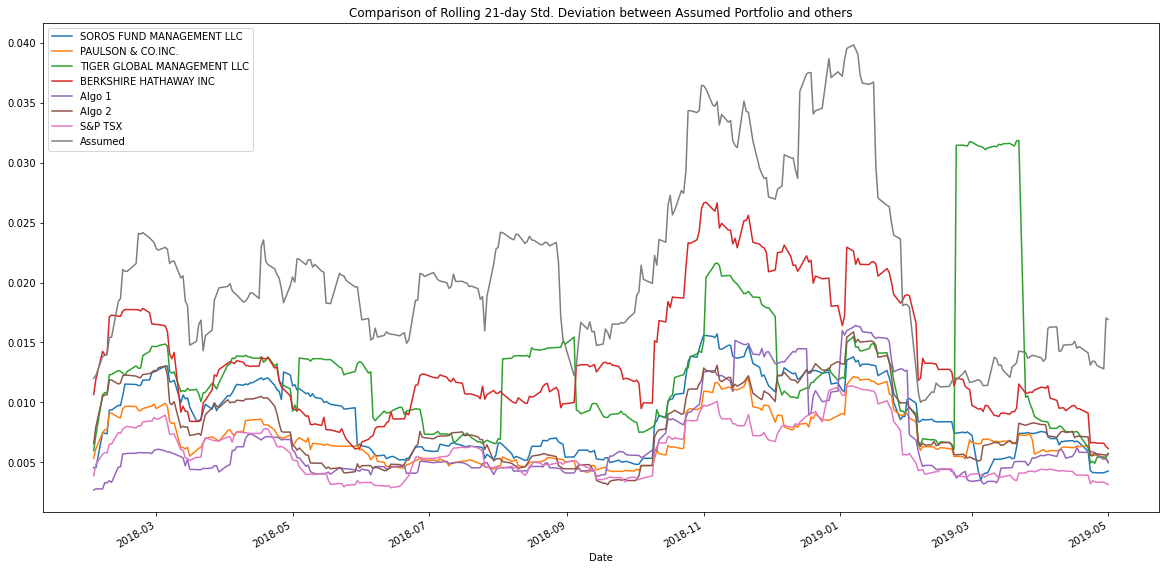

In [196]:
# Calculate rolling standard deviation
roll_std_dev2 = portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
roll_std_dev2.plot(figsize=(20,10), title = "Comparison of Rolling 21-day Std. Deviation between Assumed Portfolio and others")

### Calculate and plot the correlation

<AxesSubplot:>

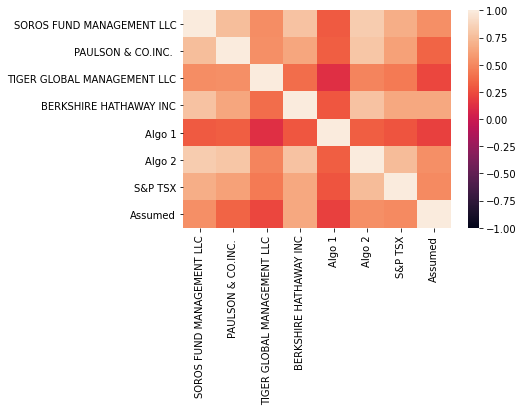

In [198]:
# Calculate and plot the correlation
corr2 = portfolio_returns.corr()
import seaborn as sns
sns.heatmap(corr2, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-day Beta for Assumed Portfolio'}, xlabel='Date'>

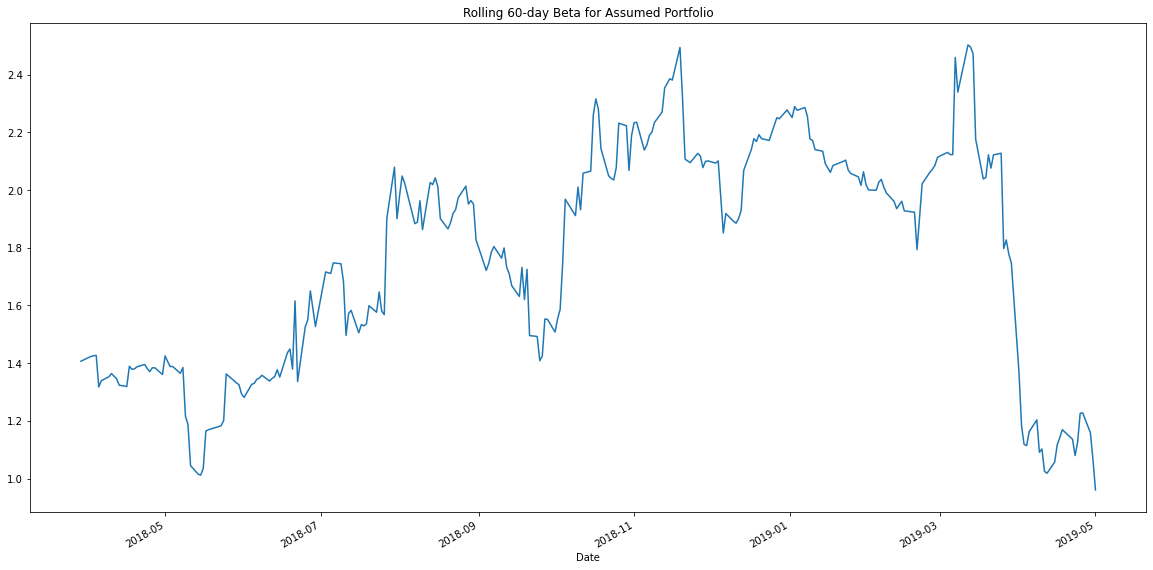

In [199]:
# Calculate and plot Beta

# Calculating the covariance of the Assumed portfolio
roll_covar2 = portfolio_returns['Assumed'].rolling(window=60).cov(combined_returns['S&P TSX'])

# Calculating variance of S&P TSX
roll_var2 = combined_returns["S&P TSX"].rolling(window = 60).var()

# Computing beta
roll_beta2 = roll_covar2 / roll_var2

# Plot beta trend
roll_beta2.plot(figsize = (20,10), title = 'Rolling 60-day Beta for Assumed Portfolio')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [201]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2 = portfolio_returns.mean()*252/(portfolio_returns.std()*np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
Assumed                        1.546162
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

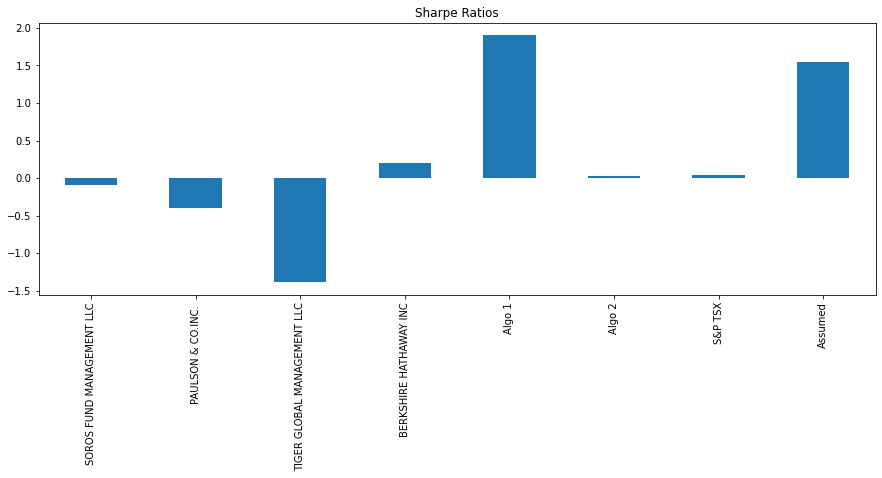

In [203]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind = "bar", title = "Sharpe Ratios", figsize = (15,5))

### How does your portfolio do?

Our assumed portfolio performs much better than most other portfolios including the S&P TSX, however it trails behind Algo 1.